<H3>PRI 2022: second
    project delivery</H3>

**GROUP 1**
- Robin Helbig, ist1105007
- Karolina Kowalczyk, ist1105122
- Hubert Budny, ist1105348

<H2>Main facilities</H2>

<h3>Part I: clustering</h3>

*Load documents*

In [13]:
from helper.documentHelper import read_files, intToCategory
from mainFunctions.clustering.clustering import clustering
from mainFunctions.clustering.evaluate import evaluate
from mainFunctions.clustering.interpret import interpret
from mainFunctions.clustering.evaluate import plot_dendrogram
from mainFunctions.clustering.evaluate import pca_plot
import numpy as np
from matplotlib import pyplot as plt

text_processing = True
documents = read_files(text_processing)

args = {'n_clusters': 7, 'max_df': 0.07, 'criteria': 'mean'}

*A) Clustering*

In [14]:
#code here
cluster_model = clustering(documents, args)
cluster_data = cluster_model.labels_

*B) Visualization*



Most important terms per cluster:
Cluster: 0
Term: cup, TFIDF: 0.024843370568730868
Term: ireland, TFIDF: 0.021996376754095683
Term: injury, TFIDF: 0.021853475273852035
Term: chelsea, TFIDF: 0.02130964502798793
Term: coach, TFIDF: 0.020548218196155037
Term: wales, TFIDF: 0.020487845308978906
Term: rugby, TFIDF: 0.01979554908185964
Term: champion, TFIDF: 0.01783531029765604
Term: league, TFIDF: 0.01664368768639274
Term: victory, TFIDF: 0.016385260232708348


Cluster: 1
Term: brown, TFIDF: 0.0180175405878584
Term: tax, TFIDF: 0.017297171846076164
Term: bank, TFIDF: 0.014602262518819985
Term: howard, TFIDF: 0.01341672388783846
Term: oil, TFIDF: 0.01273120372005187
Term: chancellor, TFIDF: 0.01238824366611565
Term: china, TFIDF: 0.012170365791593387
Term: eu, TFIDF: 0.01163123095795906
Term: tory, TFIDF: 0.011213175274127359
Term: spending, TFIDF: 0.011212009015555276


Cluster: 2
Term: awards, TFIDF: 0.03234598177312598
Term: award, TFIDF: 0.028580635351257034
Term: band, TFIDF: 0.02532

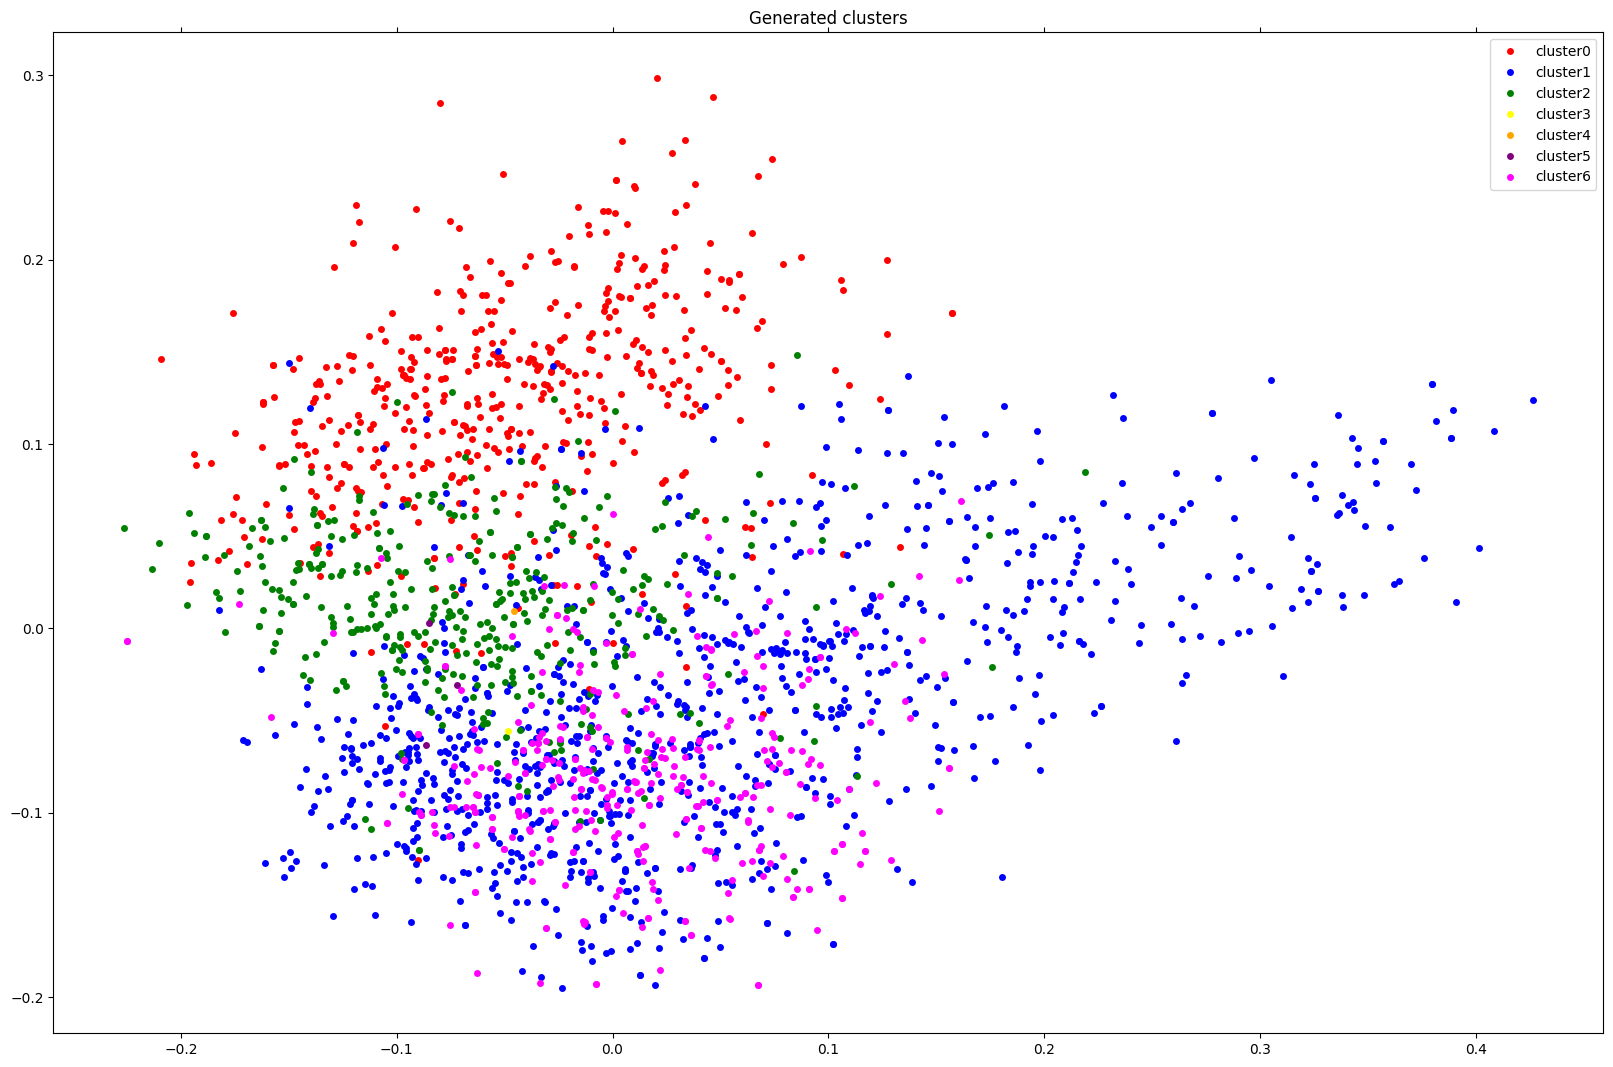

In [15]:
#code and charts here
print("\n\nMost important terms per cluster:")
relevant_term_list = interpret(cluster_data, documents, args)
for index, cluster_relevant_terms in enumerate(relevant_term_list, start=0):
    print("Cluster: " + str(index))
    for i in range(10):
        term = cluster_relevant_terms[i][0]
        tfidf = cluster_relevant_terms[i][1]
        print("Term: " + term + ", TFIDF: " + str(tfidf))
    print("\n")

pca_plot(cluster_data, documents)

*C) Evaluation*



Evaluation:
Silhouette score: 0.014244019766509094
Ran score:  0.5840523733343097
Purity score: 0.736629213483146

Dendrogram: 


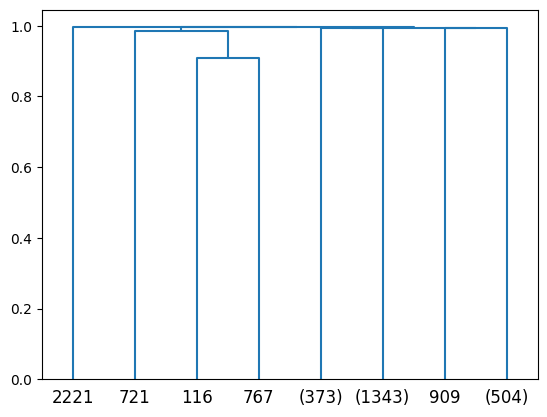

In [16]:
#code, statistics and/or charts here
sil_score, ran_score, pur_score = evaluate(cluster_data, documents)

print("\n\nEvaluation:")
print("Silhouette score: " + str(sil_score))
print("Ran score: ", str(ran_score))
print("Purity score: " + str(pur_score))

print("\nDendrogram: ")
plot_dendrogram(cluster_model, truncate_mode='level', p=3)

<h3>Part II: classification</h3>

*A) Feature extraction*

In [17]:
#code and statistics here

*B) Classification*

In [18]:
#code here

*C) Ranking extension*

In [19]:
#code here

*D) Evaluation*

In [20]:
#code, statistics and/or charts here

<h3>Part III: link analysis</h3>

*A) Graph construction*

In [21]:
#code, statistics and/or charts here

*B) Undirected page rank*

In [22]:
#code

*C) Evaluation*

In [23]:
#code, statistics and/or charts here

<H2>Question materials (optional)</H2>

<H3>Part I: clustering</H3>

**(a)** What is the (hypothesized) number of document clusters? Are the clusters cohesive? And well
separated?



Most important terms per cluster:
Cluster: 0
Term: brown, TFIDF: 0.00915282331334377
Term: mobile, TFIDF: 0.00831830998163278
Term: tax, TFIDF: 0.0077852287714746515
Term: bank, TFIDF: 0.007030316669418733
Term: howard, TFIDF: 0.006828309056096775
Term: wales, TFIDF: 0.006681548555274886
Term: phone, TFIDF: 0.006083264387344465
Term: software, TFIDF: 0.006062160620486991
Term: china, TFIDF: 0.006026983915512397
Term: ireland, TFIDF: 0.006026873539814537


Cluster: 1
Term: lifts, TFIDF: 0.5558087233196864
Term: tower, TFIDF: 0.30310755748979595
Term: tfc, TFIDF: 0.29271252967044115
Term: speed, TFIDF: 0.21689623534703287
Term: guinness, TFIDF: 0.21391823940167565
Term: elevators, TFIDF: 0.17562751780226468
Term: 101, TFIDF: 0.14524984130024882
Term: records, TFIDF: 0.13479673364023317
Term: passengers, TFIDF: 0.12629527214957165
Term: tallest, TFIDF: 0.11708501186817645


Cluster: 2
Term: newton, TFIDF: 0.21522154081462627
Term: bach, TFIDF: 0.1763626444941514
Term: electrolux, TFIDF:

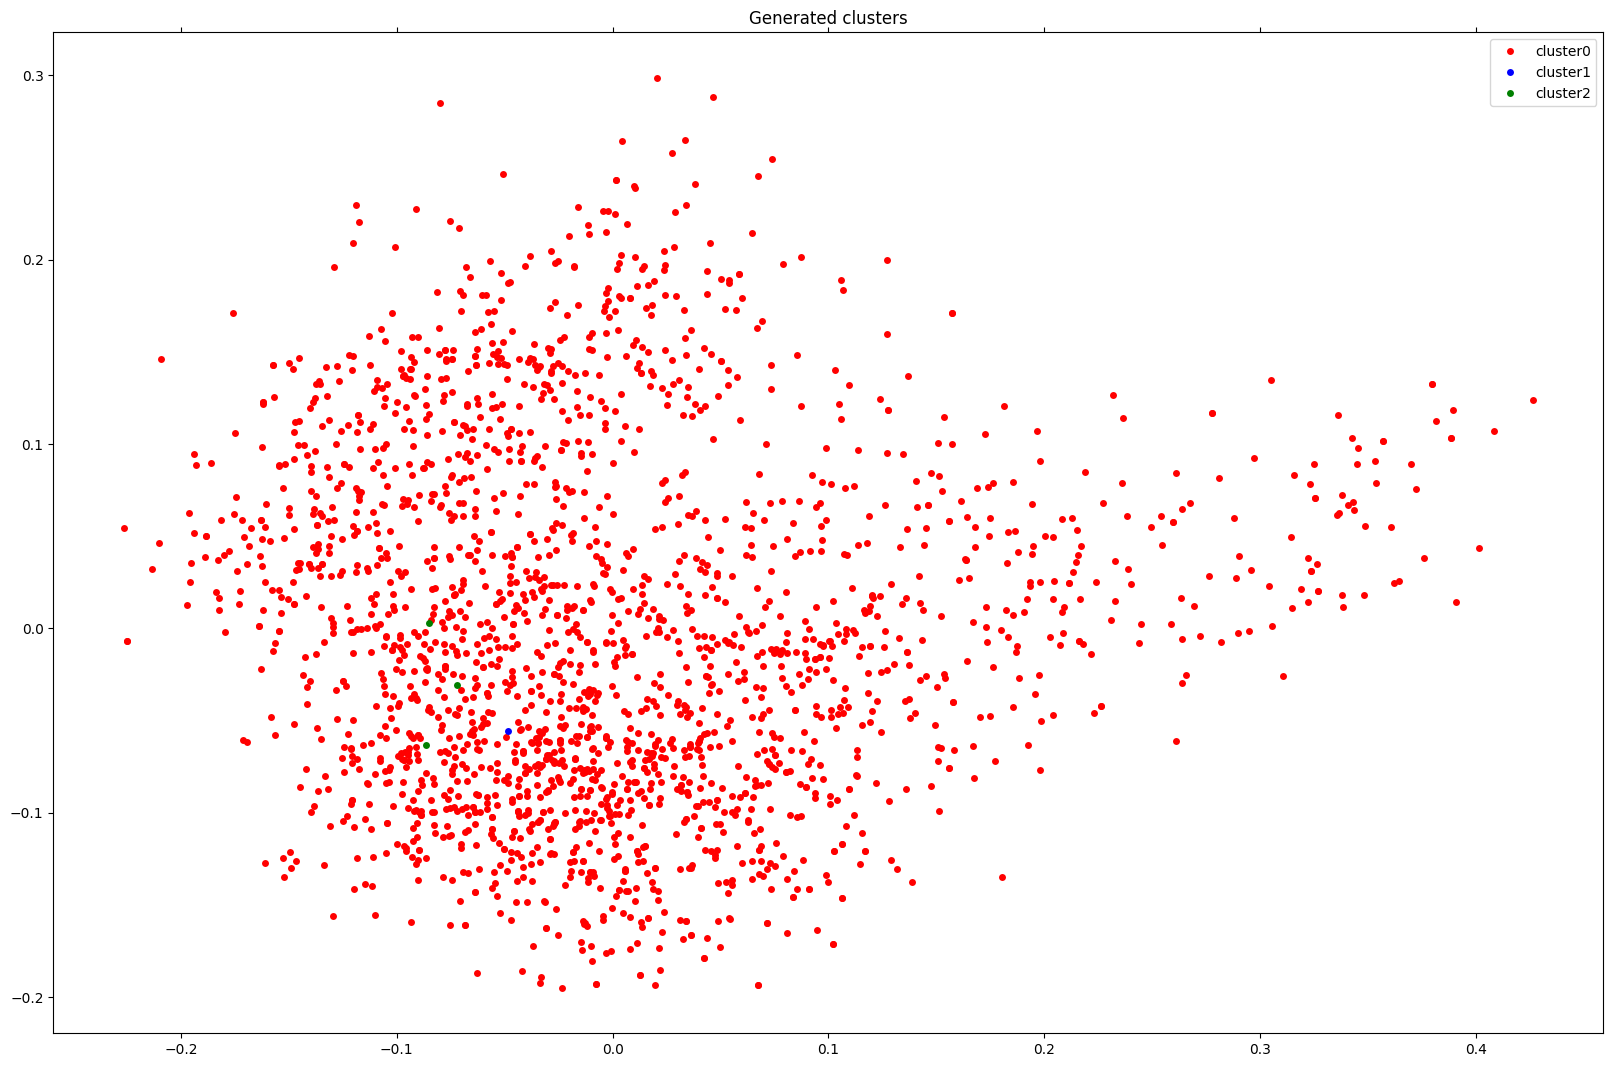



Most important terms per cluster:
Cluster: 0
Term: cup, TFIDF: 0.02479417577552546
Term: ireland, TFIDF: 0.021952819572404407
Term: injury, TFIDF: 0.021810201065388963
Term: chelsea, TFIDF: 0.021267447711100826
Term: coach, TFIDF: 0.020507528655172552
Term: wales, TFIDF: 0.020447275318268055
Term: rugby, TFIDF: 0.01975634997476685
Term: champion, TFIDF: 0.01779999285152207
Term: league, TFIDF: 0.016610729888993942
Term: victory, TFIDF: 0.0163528141728416


Cluster: 1
Term: brown, TFIDF: 0.011208341278344915
Term: mobile, TFIDF: 0.010733648860193812
Term: tax, TFIDF: 0.010046244627570658
Term: bank, TFIDF: 0.009067934238686336
Term: howard, TFIDF: 0.008638484555064621
Term: software, TFIDF: 0.007846188075816787
Term: phone, TFIDF: 0.007746868474742607
Term: china, TFIDF: 0.007457311661427192
Term: oil, TFIDF: 0.0074499878455633155
Term: awards, TFIDF: 0.007438564032058514


Cluster: 2
Term: newton, TFIDF: 0.21522154081462627
Term: bach, TFIDF: 0.1763626444941514
Term: electrolux, TFID

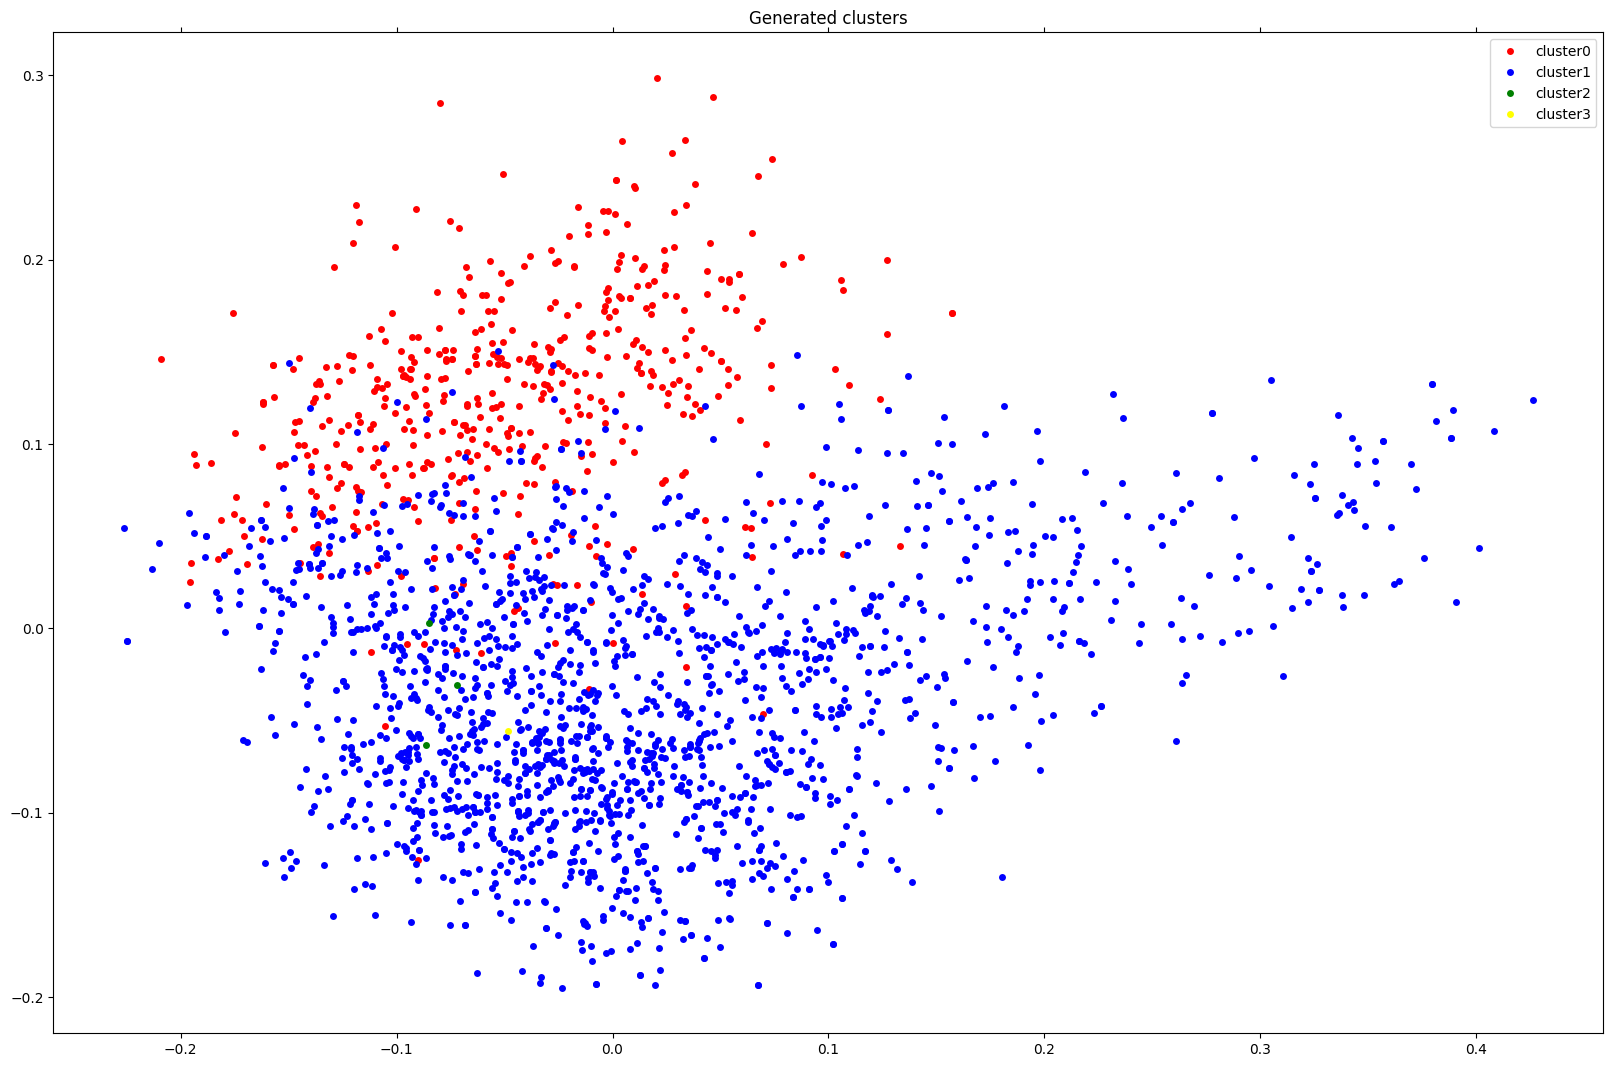



Most important terms per cluster:
Cluster: 0
Term: brown, TFIDF: 0.011208341278344915
Term: mobile, TFIDF: 0.010733648860193812
Term: tax, TFIDF: 0.010046244627570658
Term: bank, TFIDF: 0.009067934238686336
Term: howard, TFIDF: 0.008638484555064621
Term: software, TFIDF: 0.007846188075816787
Term: phone, TFIDF: 0.007746868474742607
Term: china, TFIDF: 0.007457311661427192
Term: oil, TFIDF: 0.0074499878455633155
Term: awards, TFIDF: 0.007438564032058514


Cluster: 1
Term: cup, TFIDF: 0.024843370568730868
Term: ireland, TFIDF: 0.021996376754095683
Term: injury, TFIDF: 0.021853475273852035
Term: chelsea, TFIDF: 0.02130964502798793
Term: coach, TFIDF: 0.020548218196155037
Term: wales, TFIDF: 0.020487845308978906
Term: rugby, TFIDF: 0.01979554908185964
Term: champion, TFIDF: 0.01783531029765604
Term: league, TFIDF: 0.01664368768639274
Term: victory, TFIDF: 0.016385260232708348


Cluster: 2
Term: newton, TFIDF: 0.21522154081462627
Term: bach, TFIDF: 0.1763626444941514
Term: electrolux, TFI

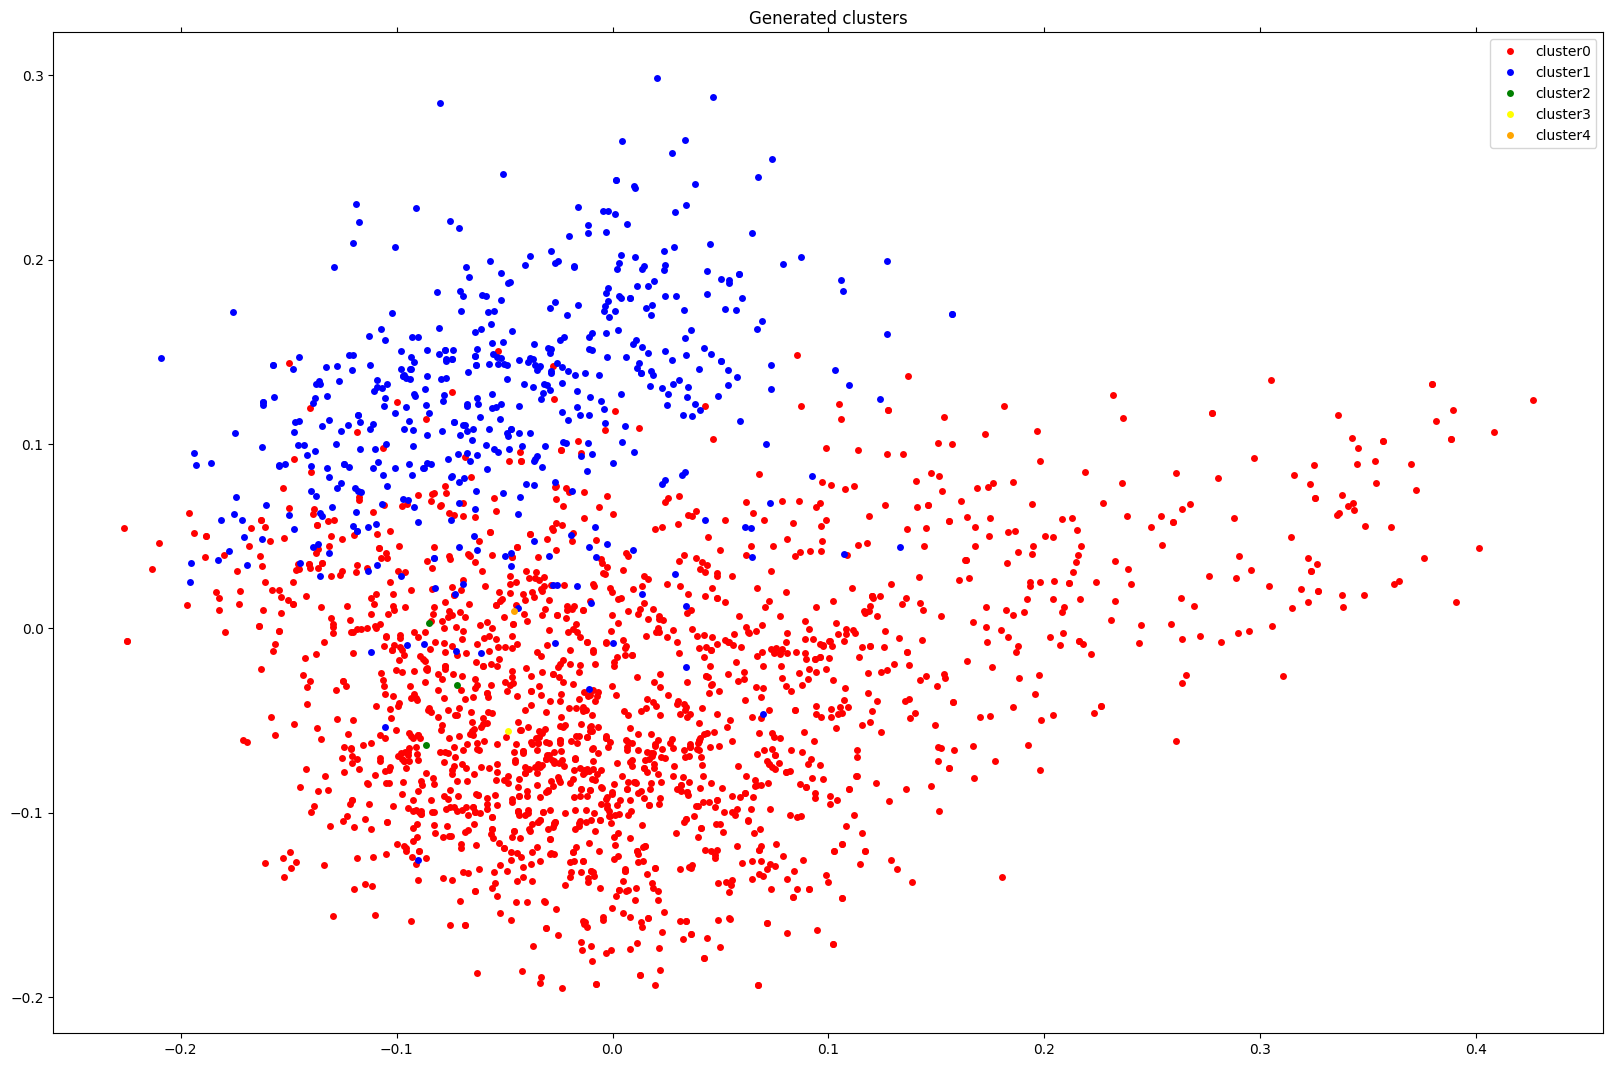



Most important terms per cluster:
Cluster: 0
Term: mobile, TFIDF: 0.013593696894817731
Term: brown, TFIDF: 0.013228067773364395
Term: tax, TFIDF: 0.012727923356866646
Term: bank, TFIDF: 0.011091283611760766
Term: howard, TFIDF: 0.009850252980944692
Term: software, TFIDF: 0.009759812803206288
Term: phone, TFIDF: 0.009728849591149153
Term: oil, TFIDF: 0.00947714170331135
Term: china, TFIDF: 0.00938775594255902
Term: chancellor, TFIDF: 0.009095166235882376


Cluster: 1
Term: cup, TFIDF: 0.024843370568730868
Term: ireland, TFIDF: 0.021996376754095683
Term: injury, TFIDF: 0.021853475273852035
Term: chelsea, TFIDF: 0.02130964502798793
Term: coach, TFIDF: 0.020548218196155037
Term: wales, TFIDF: 0.020487845308978906
Term: rugby, TFIDF: 0.01979554908185964
Term: champion, TFIDF: 0.01783531029765604
Term: league, TFIDF: 0.01664368768639274
Term: victory, TFIDF: 0.016385260232708348


Cluster: 2
Term: awards, TFIDF: 0.03234598177312598
Term: award, TFIDF: 0.028580635351257034
Term: band, TFIDF

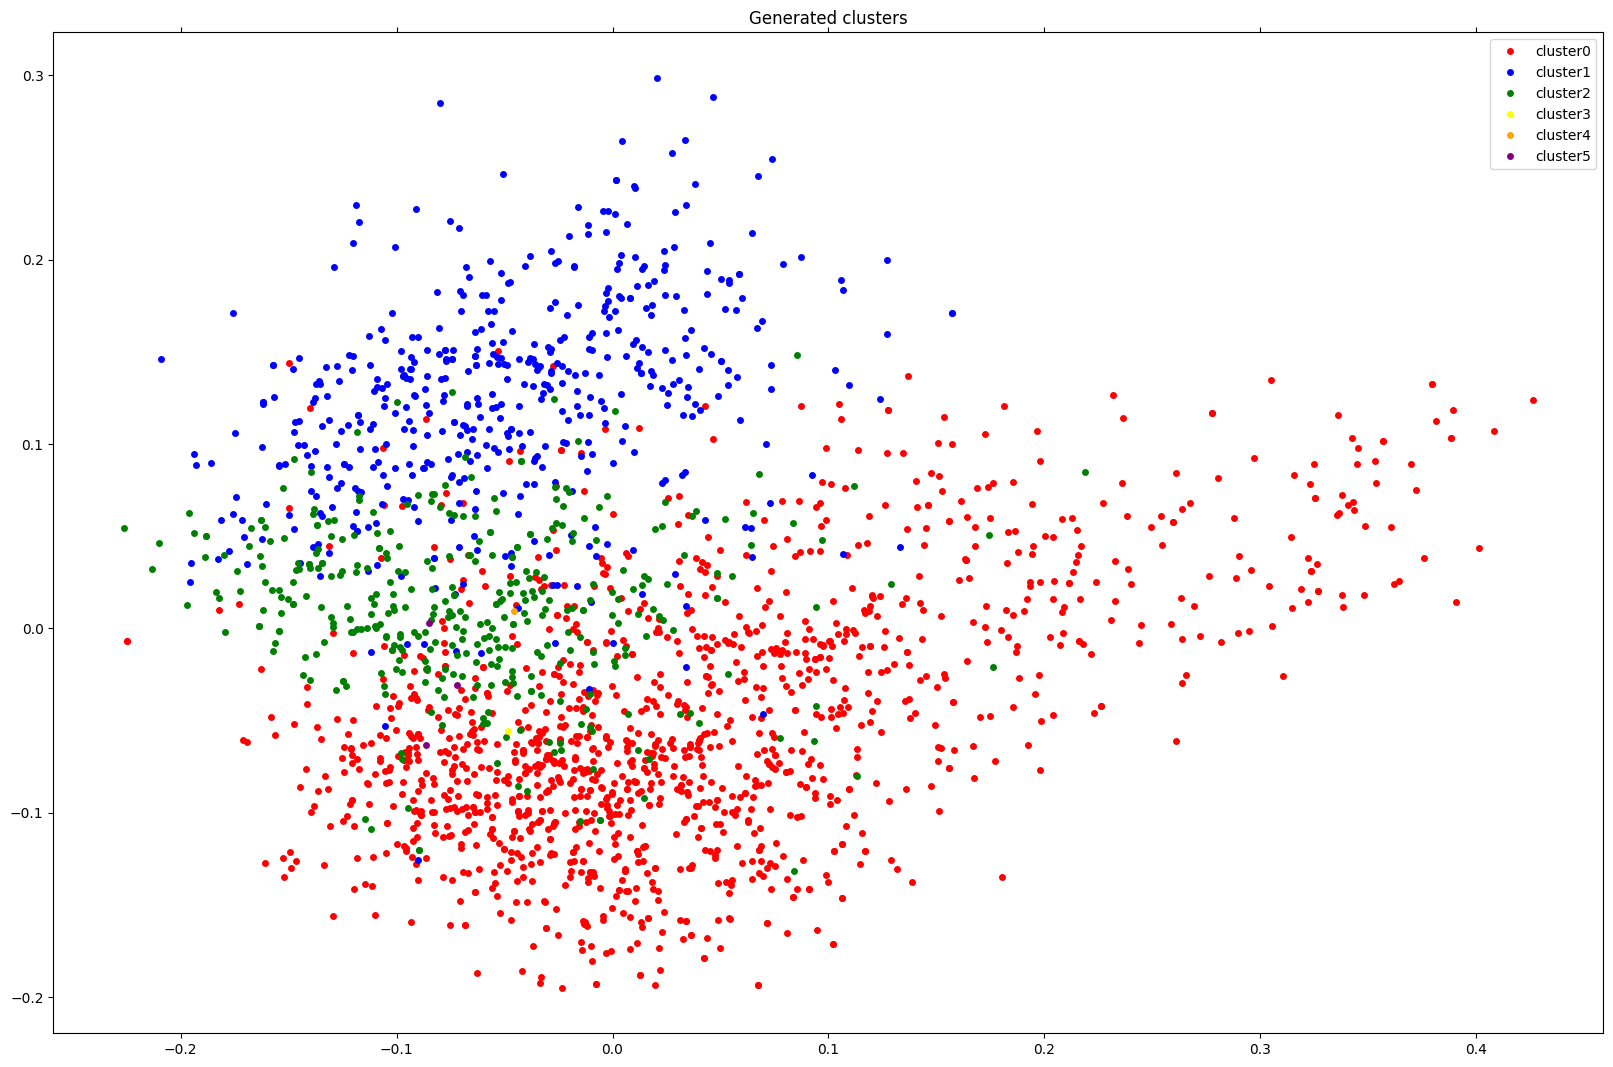



Most important terms per cluster:
Cluster: 0
Term: cup, TFIDF: 0.024843370568730868
Term: ireland, TFIDF: 0.021996376754095683
Term: injury, TFIDF: 0.021853475273852035
Term: chelsea, TFIDF: 0.02130964502798793
Term: coach, TFIDF: 0.020548218196155037
Term: wales, TFIDF: 0.020487845308978906
Term: rugby, TFIDF: 0.01979554908185964
Term: champion, TFIDF: 0.01783531029765604
Term: league, TFIDF: 0.01664368768639274
Term: victory, TFIDF: 0.016385260232708348


Cluster: 1
Term: brown, TFIDF: 0.0180175405878584
Term: tax, TFIDF: 0.017297171846076164
Term: bank, TFIDF: 0.014602262518819985
Term: howard, TFIDF: 0.01341672388783846
Term: oil, TFIDF: 0.01273120372005187
Term: chancellor, TFIDF: 0.01238824366611565
Term: china, TFIDF: 0.012170365791593387
Term: eu, TFIDF: 0.01163123095795906
Term: tory, TFIDF: 0.011213175274127359
Term: spending, TFIDF: 0.011212009015555276


Cluster: 2
Term: awards, TFIDF: 0.03234598177312598
Term: award, TFIDF: 0.028580635351257034
Term: band, TFIDF: 0.02532

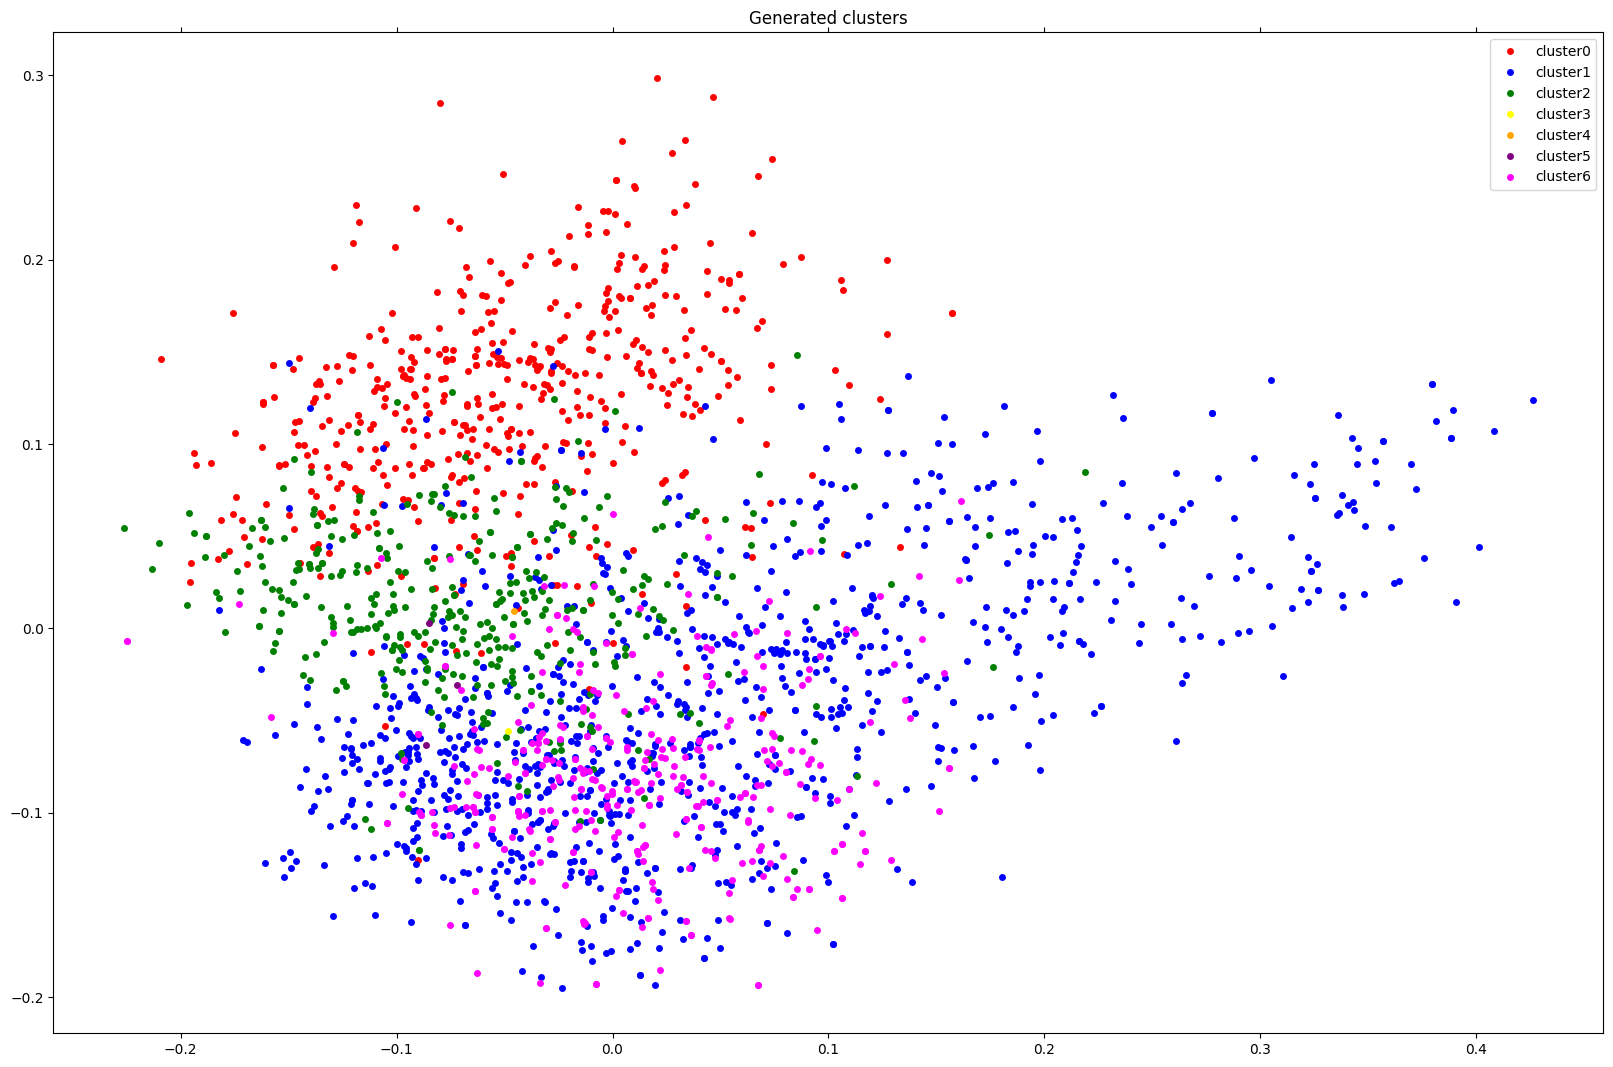



Most important terms per cluster:
Cluster: 0
Term: awards, TFIDF: 0.03234598177312598
Term: award, TFIDF: 0.028580635351257034
Term: band, TFIDF: 0.025326456943657816
Term: album, TFIDF: 0.024382514671689736
Term: festival, TFIDF: 0.023766358069099183
Term: actor, TFIDF: 0.020451090835083816
Term: films, TFIDF: 0.018771840671338604
Term: chart, TFIDF: 0.018600576795178212
Term: actress, TFIDF: 0.018127197146144233
Term: comedy, TFIDF: 0.01771174884156886


Cluster: 1
Term: brown, TFIDF: 0.0180175405878584
Term: tax, TFIDF: 0.017297171846076164
Term: bank, TFIDF: 0.014602262518819985
Term: howard, TFIDF: 0.01341672388783846
Term: oil, TFIDF: 0.01273120372005187
Term: chancellor, TFIDF: 0.01238824366611565
Term: china, TFIDF: 0.012170365791593387
Term: eu, TFIDF: 0.01163123095795906
Term: tory, TFIDF: 0.011213175274127359
Term: spending, TFIDF: 0.011212009015555276


Cluster: 2
Term: cup, TFIDF: 0.02499213326674722
Term: ireland, TFIDF: 0.022128091584958532
Term: injury, TFIDF: 0.02198

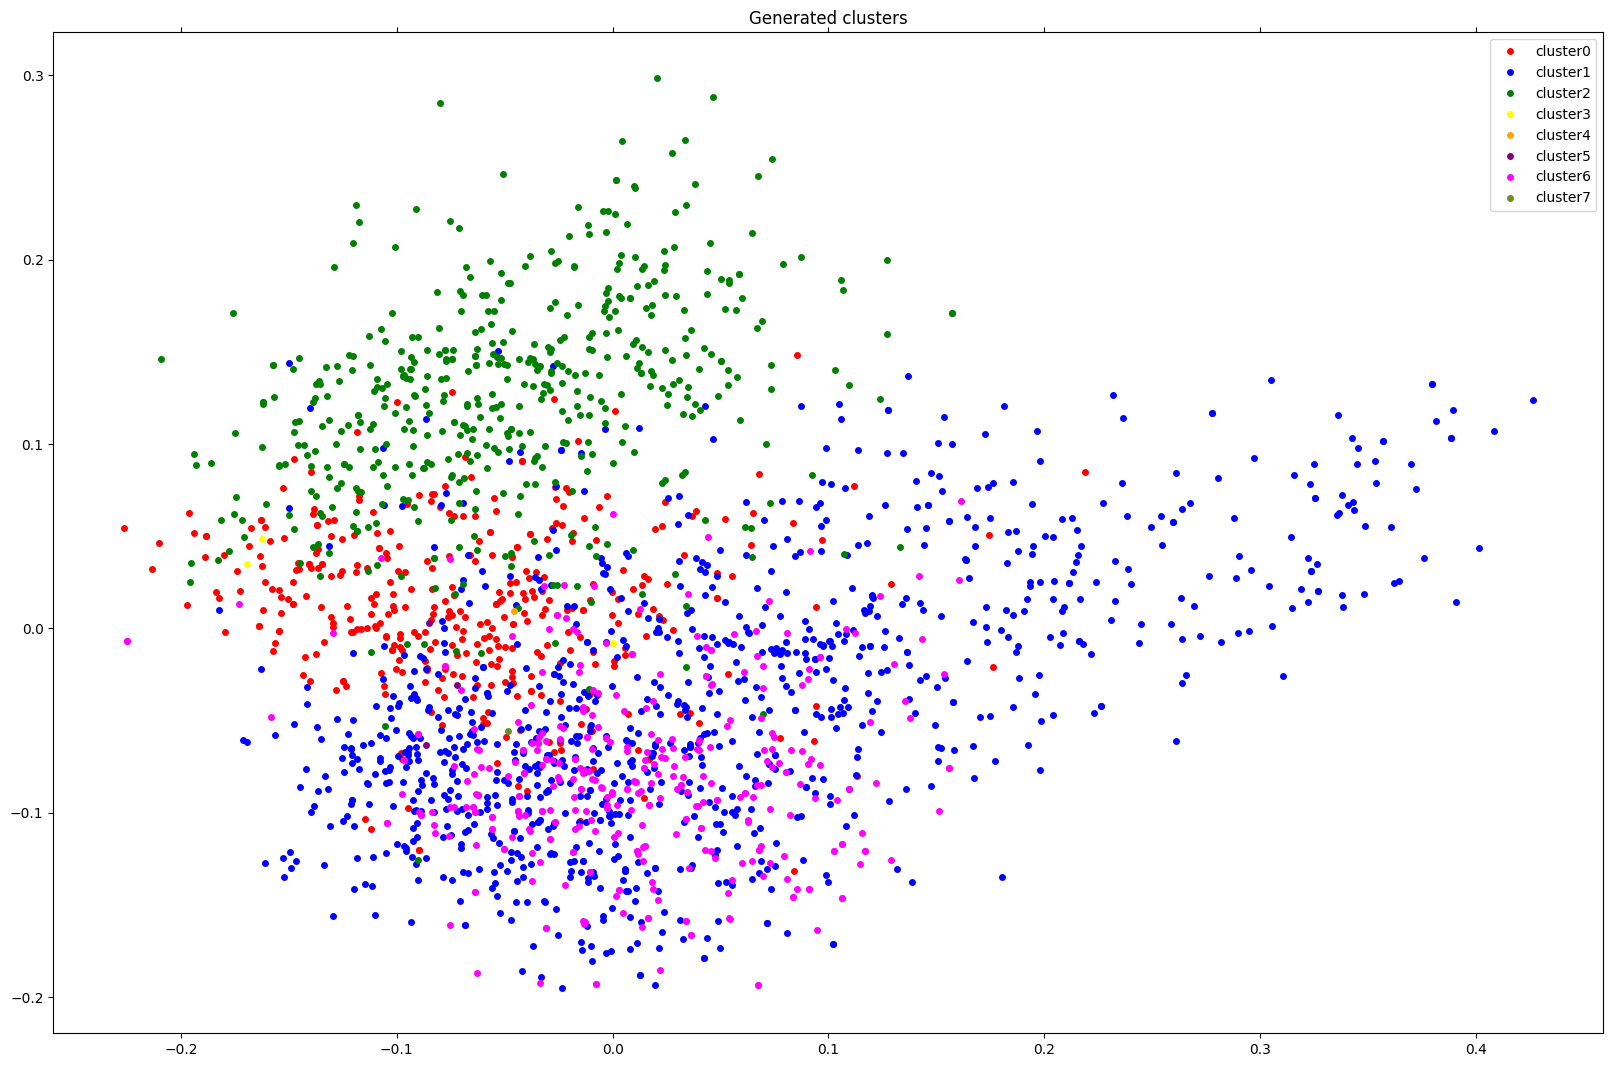



Most important terms per cluster:
Cluster: 0
Term: awards, TFIDF: 0.0334211944636454
Term: award, TFIDF: 0.029530684171797432
Term: band, TFIDF: 0.026168333628765555
Term: album, TFIDF: 0.025193013774349782
Term: festival, TFIDF: 0.024556375511839323
Term: actor, TFIDF: 0.021130905488881618
Term: chart, TFIDF: 0.01896290694593981
Term: films, TFIDF: 0.018907113862522612
Term: actress, TFIDF: 0.01872976325626537
Term: comedy, TFIDF: 0.018300505035748434


Cluster: 1
Term: brown, TFIDF: 0.0180175405878584
Term: tax, TFIDF: 0.017297171846076164
Term: bank, TFIDF: 0.014602262518819985
Term: howard, TFIDF: 0.01341672388783846
Term: oil, TFIDF: 0.01273120372005187
Term: chancellor, TFIDF: 0.01238824366611565
Term: china, TFIDF: 0.012170365791593387
Term: eu, TFIDF: 0.01163123095795906
Term: tory, TFIDF: 0.011213175274127359
Term: spending, TFIDF: 0.011212009015555276


Cluster: 2
Term: cup, TFIDF: 0.02499213326674722
Term: ireland, TFIDF: 0.022128091584958532
Term: injury, TFIDF: 0.0219843

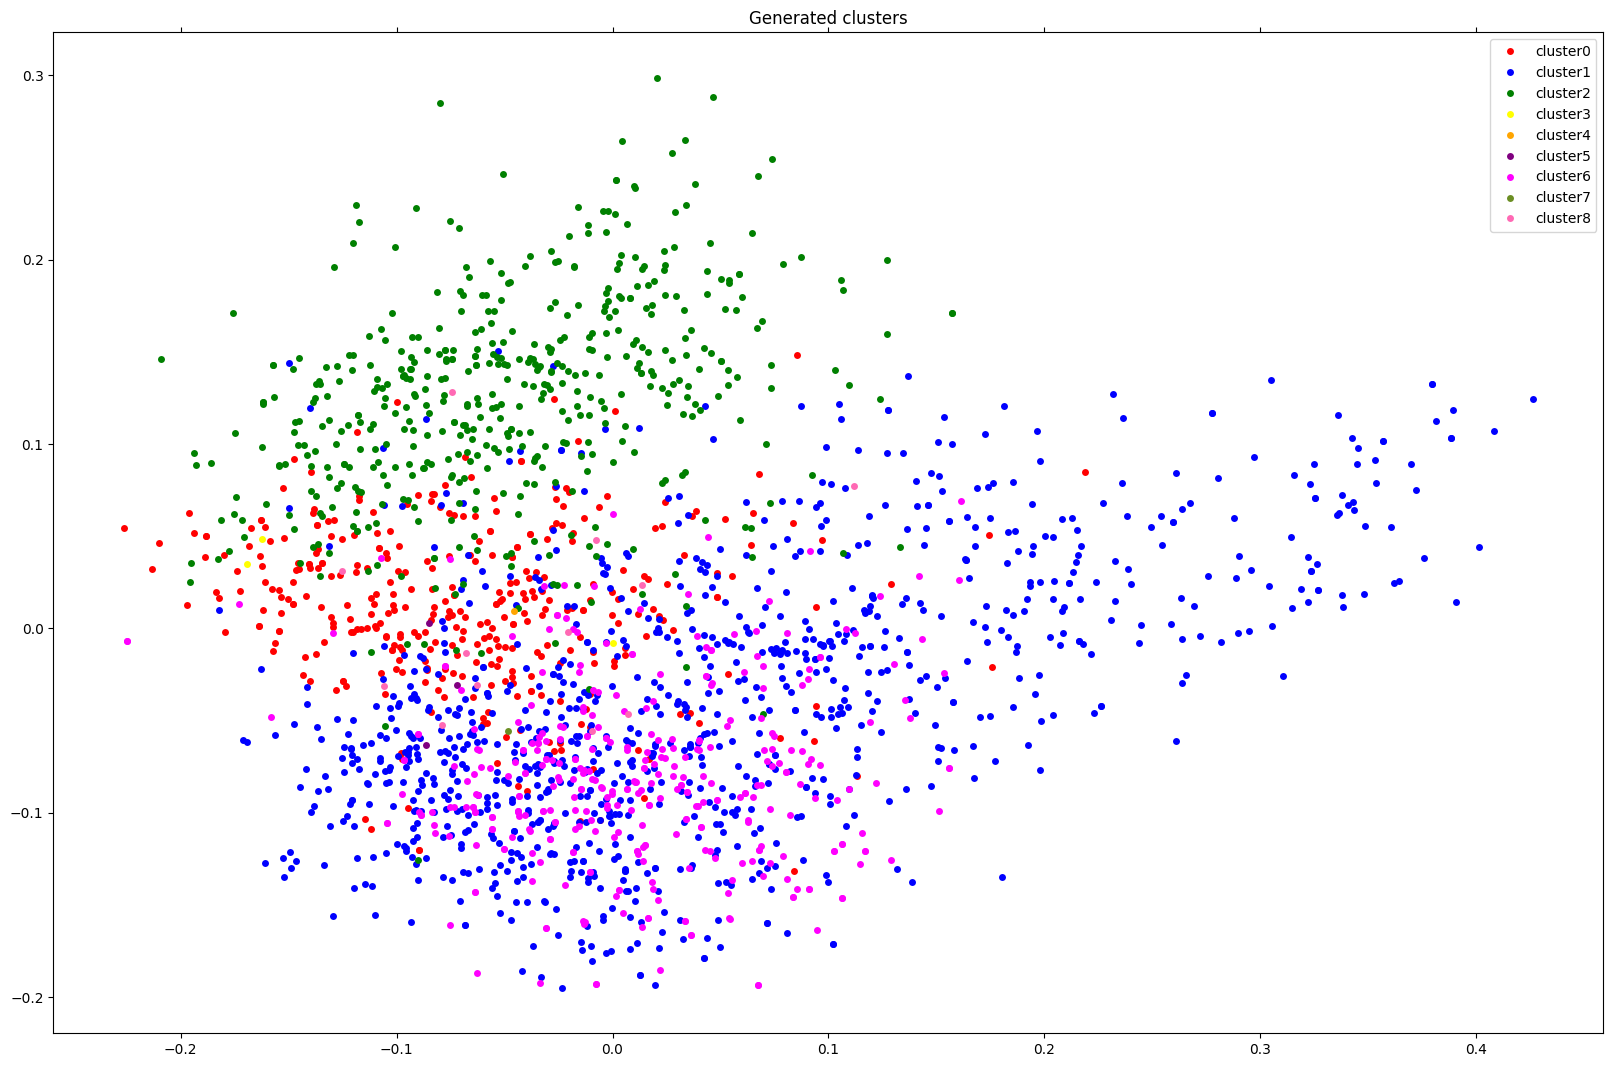



Most important terms per cluster:
Cluster: 0
Term: brown, TFIDF: 0.0180175405878584
Term: tax, TFIDF: 0.017297171846076164
Term: bank, TFIDF: 0.014602262518819985
Term: howard, TFIDF: 0.01341672388783846
Term: oil, TFIDF: 0.01273120372005187
Term: chancellor, TFIDF: 0.01238824366611565
Term: china, TFIDF: 0.012170365791593387
Term: eu, TFIDF: 0.01163123095795906
Term: tory, TFIDF: 0.011213175274127359
Term: spending, TFIDF: 0.011212009015555276


Cluster: 1
Term: awards, TFIDF: 0.03487009017738726
Term: award, TFIDF: 0.030471523211464645
Term: band, TFIDF: 0.027123061778728457
Term: album, TFIDF: 0.026285196452428532
Term: festival, TFIDF: 0.02541591604667881
Term: actor, TFIDF: 0.022046985206607698
Term: chart, TFIDF: 0.019784998287526796
Term: films, TFIDF: 0.01961077997735899
Term: actress, TFIDF: 0.019541747212461845
Term: comedy, TFIDF: 0.01882599780795311


Cluster: 2
Term: cup, TFIDF: 0.02499213326674722
Term: ireland, TFIDF: 0.022128091584958532
Term: injury, TFIDF: 0.0219843

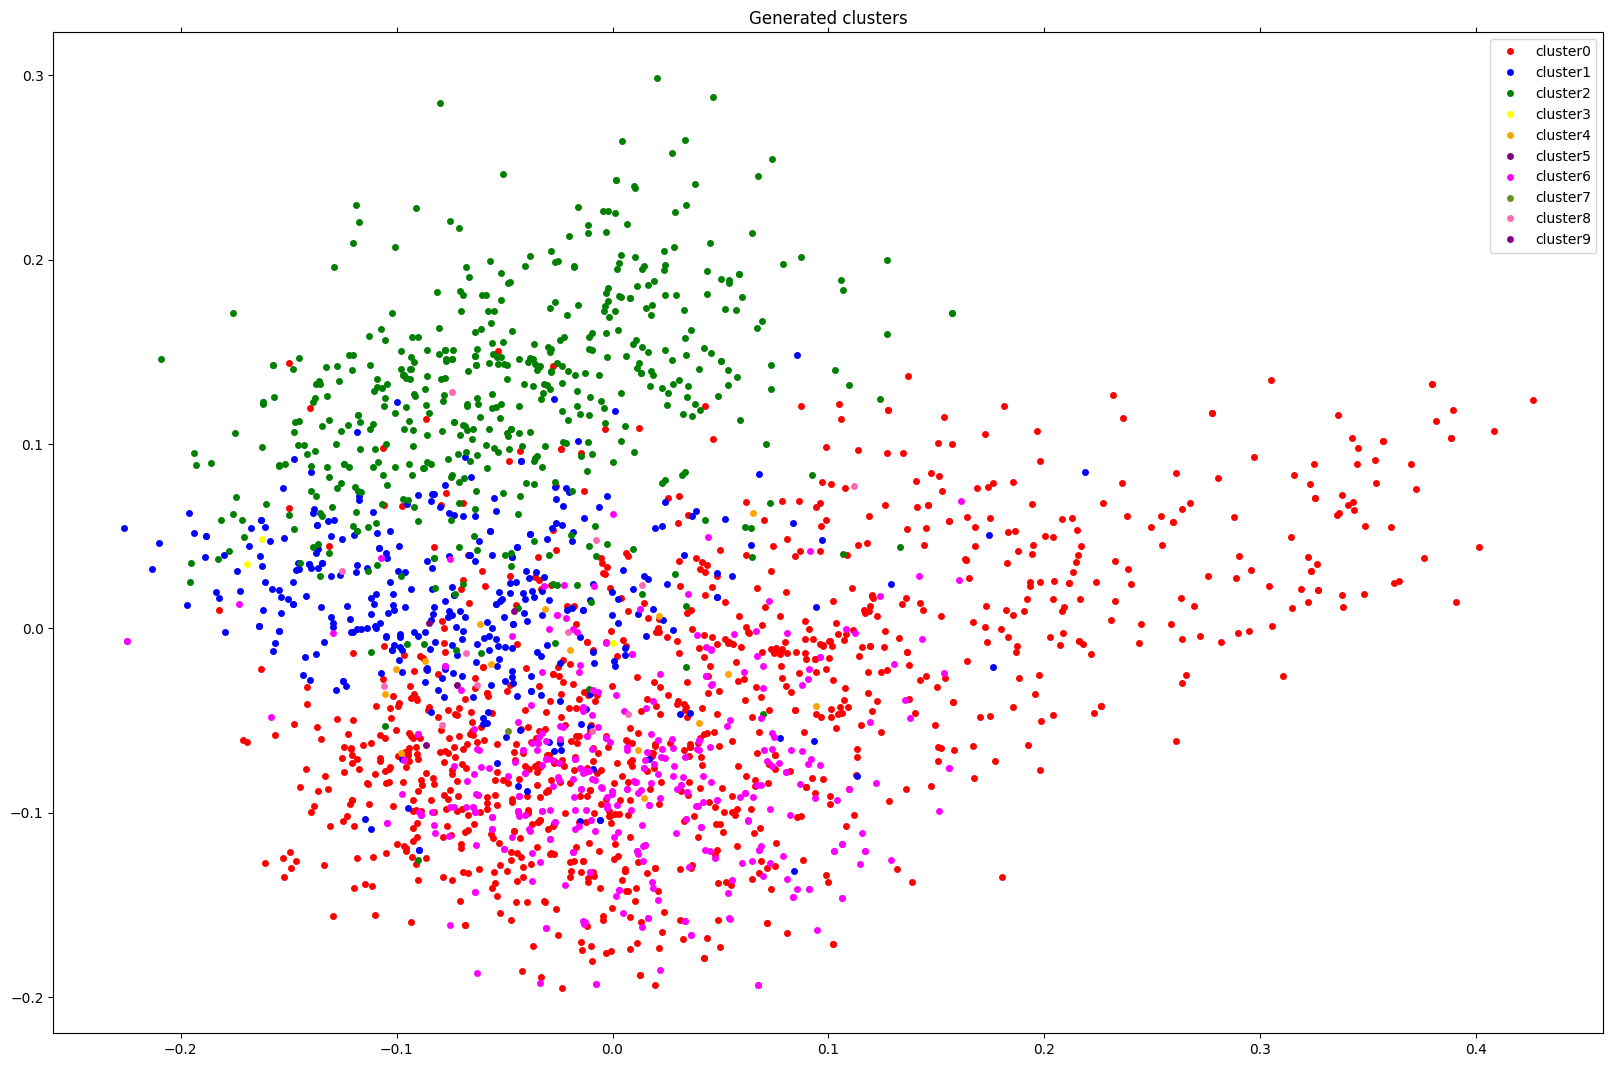

In [24]:
#code, statistics and/or charts here
sil_scores = []
ran_scores = []
pur_scores = []
for num_clusters in range(3,11):
    args = {'n_clusters': num_clusters, 'max_df': 0.07, 'criteria': 'mean'}
    cluster_model = clustering(documents, args)
    cluster_data = cluster_model.labels_

    #code and charts here
    print("\n\nMost important terms per cluster:")
    relevant_term_list = interpret(cluster_data, documents, args)
    for index, cluster_relevant_terms in enumerate(relevant_term_list, start=0):
        print("Cluster: " + str(index))
        for i in range(10):
            term = cluster_relevant_terms[i][0]
            tfidf = cluster_relevant_terms[i][1]
            print("Term: " + term + ", TFIDF: " + str(tfidf))
        print("\n")

    sil_score, ran_score, pur_score = evaluate(cluster_data, documents)
    sil_scores.append(sil_score)
    ran_scores.append(ran_score)
    pur_scores.append(pur_score)

    print("\n\nEvaluation:")
    print("Silhouette score: " + str(sil_score))
    print("Ran score: ", str(ran_score))
    print("Purity score: " + str(pur_score))

    pca_plot(cluster_data, documents)

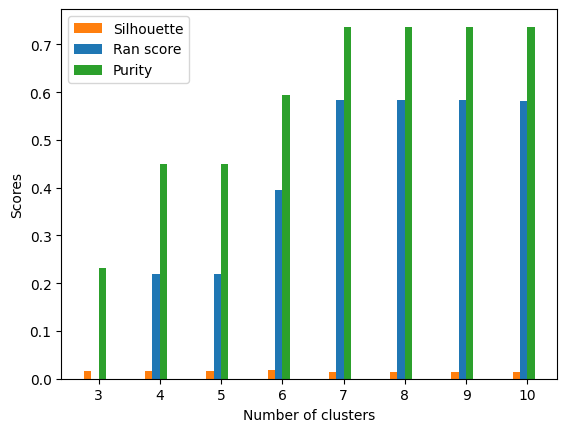

In [28]:
N = 8

ind = np.arange(N)  # the x locations for the groups
width = 0.12       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, sil_scores, width, color='#ff7f0e')
rects2 = ax.bar(ind, ran_scores, width, color='#1f77b4')
rects3 = ax.bar(ind + width, pur_scores, width, color='#2ca02c')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_xlabel('Number of clusters')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('3', '4', '5', '6', '7', '8', '9', '10'))

ax.legend((rects1[0], rects2[0], rects3[0]), ('Silhouette', 'Ran score', 'Purity'))

plt.show()

**(b)** What the clustering reveals regarding the conceptual organization of documents?

In [ ]:
#code, statistics and/or charts here

**...** (additional questions with empirical results)

<H3>END</H3>